### **Objective of the Project : -**


The data provided includes operational variables of numerous restaurants throughout the Tri-state area. Covid has caused the restaurant industry to change their operations and many restaurants realize that they may continue the new operating style. The goal of the project is to mine this data to gain insights on how to adjust your strategy in opening a restaurant to achieve the highest revenue.

Also, perform the following steps:

1. Advise your company on the factors/variables that affect the revenue of your proposed restaurant.
2. Use the results of the model to estimate the expected revenue of planned restaurants to be opened.
3. Analyze the data file with a neural net methodology and compare the results to the regression analysis for expected revenue.

###**Data Information :-**

*Explanatory Variables:*
1. Restaurant: Identifier of restaurant location
2. App: Whether the restaurant belongs to an App network where the App lets people remotely book reservations (there is no penalty to consumers who do not show for reservations)(1 the restaurant uses the App, 0 they do not)
3. Take Out Service: Whether the restaurant services take out orders. (1 Yes, 0 No)
4. Area Income: The per family average income of the area where the restaurant is located (10 mile radius)
5. Town Population: The population of the surrounding 10-mile radius of the restaurant.
6. OutDoor Dining: Whether the restaurant provides outdoor dining. (1 Yes, 0 No)
7. Dist. from Town Center: The number of miles the restaurant is from the nearest town center.

*Target Variable:*
8. Monthly Revenue: The monthly revenue generated by the restaurant

### Importing Necessary Packages and Modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import *
from sklearn.metrics import *
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Data Fetching


Data fetching involves extraction of data from the excel file which comprises of 8 columns. Monthly Revenue is the output column and all other columns are input columns.

This step involves reading the excel file through pandas 'read_excel' file.



In [ ]:
rest_data=pd.ExcelFile('restautant_for_process.xlsx')

In [ ]:
rest_data_train = pd.read_excel(rest_data,'train')
type(rest_data_train)

pandas.core.frame.DataFrame

In [ ]:
#sns.pairplot(rest_data_train)

Getting the glimpse of the data

In [ ]:
rest_data_train

,Restaurants,App,Take_Out_Service,Area_Income,Town_Population,Outdoor_Dining,Distance_from_Town_Center,Monthly_Revenue
0,LPK,1,0,55015,70000,0,4.00,147900.000000
1,WDU,0,1,60145,140000,0,2.15,492000.000000
2,LJP,1,0,55514,50000,0,5.15,148000.000000
3,SMM,1,1,69560,130000,0,4.55,225000.000000
4,SLV,0,1,76000,140000,0,2.99,428583.333333
...,...,...,...,...,...,...,...,...
94,SMM,1,0,58000,50000,0,3.00,123333.333333
95,SLV,1,0,107034,100000,1,3.11,304833.333333
96,NGT,0,1,94425,200000,0,6.00,552333.333333
97,WWD,0,1,57000,240000,0,1.79,593583.333333


Checking for the missing values in all the columns. isna(). sum() returns the number of missing values in each column. One of the most difficult yet frequent aspects of data cleaning is dealing with missing data or values.

In [ ]:
rest_data_train.isna().sum()

Restaurants                  0
App                          0
Take_Out_Service             0
Area_Income                  0
Town_Population              0
Outdoor_Dining               0
Distance_from_Town_Center    0
Monthly_Revenue              0
dtype: int64

In [ ]:
rest_data_train.isnull().sum()

Restaurants                  0
App                          0
Take_Out_Service             0
Area_Income                  0
Town_Population              0
Outdoor_Dining               0
Distance_from_Town_Center    0
Monthly_Revenue              0
dtype: int64

value_counts() function return a series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default. Checking for unique values in the "Restaurant" column.

In [ ]:
rest_data_train.Restaurants.value_counts()

LJP    3
SMM    3
SLV    3
NGT    3
WWD    3
      ..
ETY    1
HGD    1
PIN    1
BFE    1
ENK    1
Name: Restaurants, Length: 76, dtype: int64

In [ ]:
temp = rest_data_train

We don't need a "Restaurant" column in our analysis. It has lots of categorical values. We can drop the column.

In [ ]:
temp=temp.drop(columns=['Restaurants'])

In [ ]:
temp

,App,Take_Out_Service,Area_Income,Town_Population,Outdoor_Dining,Distance_from_Town_Center,Monthly_Revenue
0,1,0,55015,70000,0,4.00,147900.000000
1,0,1,60145,140000,0,2.15,492000.000000
2,1,0,55514,50000,0,5.15,148000.000000
3,1,1,69560,130000,0,4.55,225000.000000
4,0,1,76000,140000,0,2.99,428583.333333
...,...,...,...,...,...,...,...
94,1,0,58000,50000,0,3.00,123333.333333
95,1,0,107034,100000,1,3.11,304833.333333
96,0,1,94425,200000,0,6.00,552333.333333
97,0,1,57000,240000,0,1.79,593583.333333


In [ ]:
Z=temp.drop(columns=['App','Take_Out_Service','Area_Income','Town_Population','Outdoor_Dining'])
z_max=Z['Monthly_Revenue'].max()
z_max_2=Z['Distance_from_Town_Center'].max()

Z['Monthly_Revenue']=Z['Monthly_Revenue']/z_max
Z['Distance_from_Town_Center']=Z['Distance_from_Town_Center']/z_max_2


In [ ]:
y = temp['Monthly_Revenue']

In [ ]:
temp = temp.drop(columns=['Monthly_Revenue'])

In [ ]:
X=temp

Training data is the subset of original data that is used to train the machine learning model, whereas testing data is used to check the accuracy of the model. Splitting the dataset into train and test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We can use the Random Forest algorithm for feature importance implemented in scikit-learn as the RandomForestRegressor.

In [ ]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

The feature importance (variable importance) describes which features are relevant. It can help with better understanding of the solved problem and sometimes lead to model improvements by employing the feature selection.

[1 0 4 2 3 5]


Text(0.5, 0, 'Feature Importance')

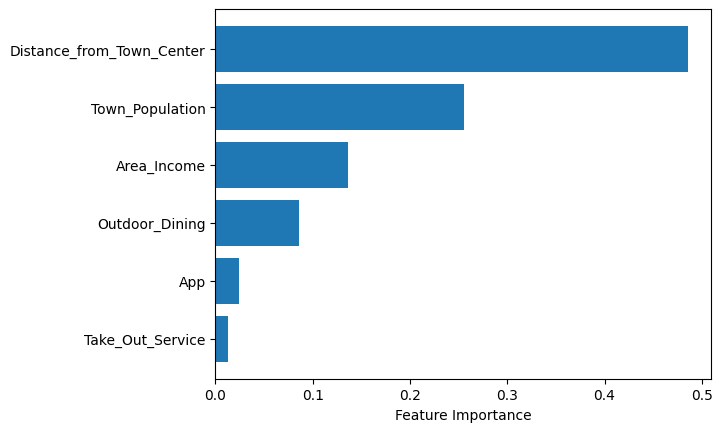

In [ ]:
sort = rf.feature_importances_.argsort()
print(sort)
plt.barh(temp.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


By looking at this graph, we can see that "Distance_from_Town_Center" column is the most relevant faeture to the "Monthly_Revenue" column.

In [ ]:
X1=X.drop(columns=['App','Take_Out_Service','Area_Income','Outdoor_Dining','Town_Population'])

In [ ]:
X2=X.drop(columns=['App','Take_Out_Service','Town_Population','Outdoor_Dining','Distance_from_Town_Center'])

In [ ]:
X2

,Area_Income
0,55015
1,60145
2,55514
3,69560
4,76000
...,...
94,58000
95,107034
96,94425
97,57000


In [ ]:
y

0     147900.000000
1     492000.000000
2     148000.000000
3     225000.000000
4     428583.333333
          ...      
94    123333.333333
95    304833.333333
96    552333.333333
97    593583.333333
98    407958.333333
Name: Monthly_Revenue, Length: 99, dtype: float64


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame. We are implementing two methods(IQR, Z-score) to remove outliers from the data.

In [ ]:
IQR_outliers=[]
IQR_final_data=[]

X3=X2.values.tolist()

X3=sorted(X3)
print("X3 : ",X3)
q1,q3=np.percentile(X3,[25,75])
print(q1,q3)
iqr=q3-q1
print("iqr:",iqr)
lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)
print(f'\nlower fence : {lower_fence} higer fence : {higher_fence}')


for i in X3:
    if i<lower_fence or i>higher_fence:
        IQR_outliers.append(i)
    else:
        IQR_final_data.append(i)
print("IQR Outliers : ",IQR_outliers)
print("IQR data after outliers :",IQR_final_data)

X3 :  [[49000], [51294], [53000], [53007], [54000], [54712], [55000], [55000], [55000], [55015], [55514], [55600], [55907], [57000], [57000], [58000], [58000], [59710], [60145], [60241], [61487], [64635], [65349], [65829], [65967], [66276], [67000], [67000], [67800], [67867], [68000], [69000], [69162], [69560], [75000], [75000], [75217], [75944], [75999], [76000], [76000], [76000], [76255], [76392], [76757], [78188], [78600], [79500], [81145], [81394], [83944], [84058], [85095], [85407], [87000], [87000], [88000], [88560], [90380], [91950], [93701], [93772], [94425], [94781], [95008], [95419], [96018], [97982], [98000], [98000], [98116], [98712], [98868], [99760], [100609], [103247], [104493], [105443], [105764], [106572], [106815], [107034], [110000], [113259], [114767], [117263], [118081], [118513], [119476], [124670], [135000], [137000], [137000], [138000], [145000], [147700], [150000], [152300], [165000]]
66121.5 100184.5
iqr: 34063.0

lower fence : 15027.0 higer fence : 151279.0
I

In [ ]:
z_outliers=[]
z_final_data=[]

X4=X2
#print("X4 : ",X4)

z_mean = np.mean(X4)
print('mean :',z_mean)

z_std = np.std(X4)
print('std :',z_std)

thresold = 1.0

for i in X4['Area_Income']:
    z = (i-z_mean)/z_std
    #print(type(z))
    print(float(z))
    if float(z) > thresold:
        z_outliers.append(i)
    else:
        z_final_data.append(i)


print('\nz_outliers :',z_outliers)
print('\nz_final_data :',z_final_data)



mean : Area_Income    86741.717172
dtype: float64
std : Area_Income    26576.21245
dtype: float64
-1.1938013075062357
-1.0007715441569278
-1.1750251180498412
-0.6465073683413852
-0.4041854042147686
0.5217930453491921
-0.7700765189922871
-0.30635355534377434
0.4504134233075474
-1.194365722018953
-0.8049573358782147
-0.6614831667454836
-1.1602374578166486
0.48984718392939436
0.42362254777056746
-1.194365722018953
0.8751541579443871
-0.9502752590858223
-0.4041854042147686
1.8158450124731782
0.06841768110049597
-0.20122194544163668
-0.7052064776639817
-0.3218561406264088
-0.1052714782797
-1.420131527105863
-1.194365722018953
0.3024991933414403
-0.4418130383959203
-1.0814828194754982
1.8911002808354813
-0.9971592912755374
-0.06196207133719446
0.32650562394901506
-0.7428341118451334
-0.2724886845807379
0.047346205959051056
2.293715966573804
0.2645329104526583
0.4562833342398071
0.009718571777899414
0.4229452503553067
-0.4041854042147686
1.054525090085937
0.427987353335581
-0.3894353716157572

/Users/chiragcontractor/miniforge3/envs/env_tensorflow/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
#X4.describe()
#outliers_IQR(X2)

In [ ]:
x_iqr_final = IQR_final_data

In [ ]:
x_iqr_outliers = IQR_outliers
x_iqr_outliers=pd.DataFrame(x_iqr_outliers,columns=['xxx'])
x_iqr_outliers

,xxx
0,152300
1,165000


In [ ]:
final_x=rest_data_train.drop(columns=['Restaurants','App','Take_Out_Service','Outdoor_Dining','Distance_from_Town_Center','Town_Population'])
final_x

,Area_Income,Monthly_Revenue
0,55015,147900.000000
1,60145,492000.000000
2,55514,148000.000000
3,69560,225000.000000
4,76000,428583.333333
...,...,...
94,58000,123333.333333
95,107034,304833.333333
96,94425,552333.333333
97,57000,593583.333333


In [ ]:

for i in x_iqr_outliers['xxx']:
    print(i)
    final_x=final_x[final_x['Area_Income'] != i]
final_x

152300
165000


,Area_Income,Monthly_Revenue
0,55015,147900.000000
1,60145,492000.000000
2,55514,148000.000000
3,69560,225000.000000
4,76000,428583.333333
...,...,...
94,58000,123333.333333
95,107034,304833.333333
96,94425,552333.333333
97,57000,593583.333333


Text(0, 0.5, 'Monthly_Revenue')

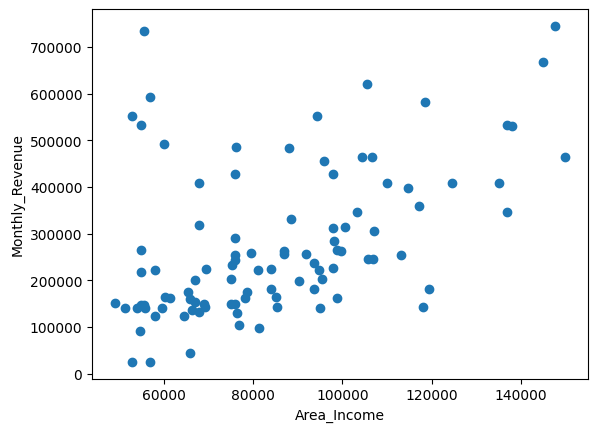

In [ ]:
plt.scatter(final_x['Area_Income'],final_x['Monthly_Revenue'])
plt.xlabel('Area_Income')
plt.ylabel('Monthly_Revenue')

In [ ]:
from scipy.stats import *

In [ ]:
linregress(final_x['Area_Income'],final_x['Monthly_Revenue'])

LinregressResult(slope=3.0657276730063647, intercept=17347.977384849335, rvalue=0.47332153709809105, pvalue=9.772016128977544e-07, stderr=0.5853788857599658, intercept_stderr=51964.776930271626)

In [ ]:
np.corrcoef(final_x['Area_Income'],final_x['Monthly_Revenue'])

array([[1.        , 0.47332154],
       [0.47332154, 1.        ]])

In [ ]:
spearmanr(final_x['Area_Income'],final_x['Monthly_Revenue'])

SpearmanrResult(correlation=0.4900684270076534, pvalue=3.488250893500867e-07)

###**Checking Correlation between Features**

A heat map represents these coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building. The heat map transforms the correlation matrix into color coding.

/var/folders/5r/b32kh8x949n4gf7n_b3yt7c40000gn/T/ipykernel_23949/2144842434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rest_data_train.corr(),cmap="YlGnBu", annot = True)


<AxesSubplot: >

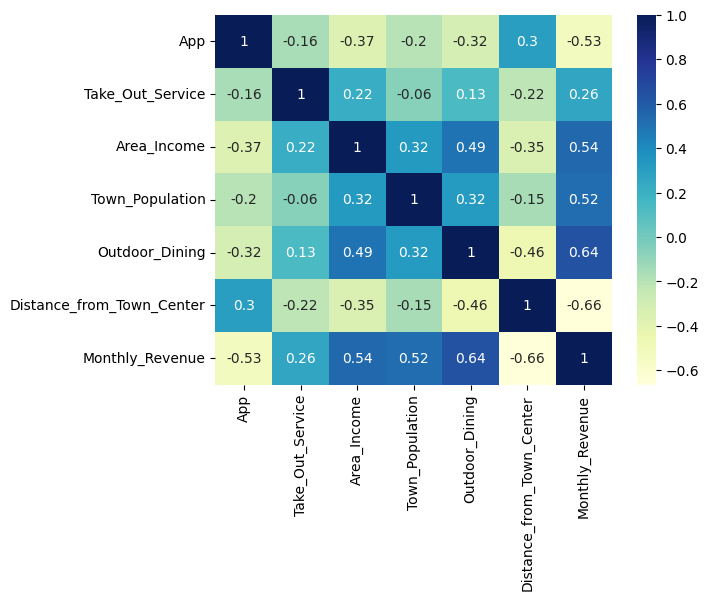

In [ ]:
sns.heatmap(rest_data_train.corr(),cmap="YlGnBu", annot = True)

In [ ]:
final_x

,Area_Income,Monthly_Revenue
0,55015,147900.000000
1,60145,492000.000000
2,55514,148000.000000
3,69560,225000.000000
4,76000,428583.333333
...,...,...
94,58000,123333.333333
95,107034,304833.333333
96,94425,552333.333333
97,57000,593583.333333


###**Creating a Linear Regression Model**

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

In [ ]:
model = LinearRegression().fit(np.array(final_x['Area_Income']).reshape(-1,1),final_x['Monthly_Revenue'])


In [ ]:
r_sq = model.score(np.array(final_x['Area_Income']).reshape(-1,1),final_x['Monthly_Revenue'])
print('coefficient of determination:', r_sq)

coefficient of determination: 0.22403327748089963


In [ ]:
print('intercept:', model.intercept_)

intercept: 17347.977384849335


In [ ]:
print('slope:', model.coef_)

slope: [3.06572767]


In [ ]:
y_pred = model.predict(np.array(final_x['Area_Income']).reshape(-1,1))
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[186008.98531529 201736.16827782 187538.78342412 230599.99431917
 250343.28053333 325787.77283835 220532.14464102 258314.17248315
 319972.08744265 185962.9994002  217690.21508814 229379.83470532
 188743.61439962 323184.97004396 317789.28933947 185962.9994002
 354578.02141555 205850.37481499 250343.28053333 431221.21324071
 288848.82010629 266879.81560153 225817.45914928 257051.09268187
 274697.4211677  167568.63336216 185962.9994002  307920.71196007
 247277.55286033 195160.18241922 437352.66858672 202030.47813443
 278226.07371933 309876.64621544 222751.73147628 261073.32738886
 287132.01260941 470155.95468789 304827.392738   320450.34095964
 284066.2849364  317734.10624136 250343.28053333 369192.34523277
 318144.91374954 251545.04578115 399552.24637855 219161.76437119
 317789.28933947 252664.0363818  437352.66858672 364569.22790188
 192094.45474621 376844.40150459 185080.06983037 308616.63214184
 440418.39625973 179831.54405419 275046.91412242 219584.83479006
 22888

In [ ]:
mean_squared_log_error(final_x['Monthly_Revenue'],y_pred)

0.3212825607132072

In [ ]:
rest_data_test = pd.read_excel(rest_data,'test')
rest_data_test

,Restaruants,App,Take_Out_Servce,Area_Income,Town_Pop,OutDoor_Dining,Distance_from_Town_Center
0,PPI,0,1,56000,29000,1,9.00
1,TRE,0,0,110000,115000,0,1.00
2,GGT,1,1,67000,252000,0,3.00
3,MND,0,0,105000,71000,0,2.00
4,WRT,0,1,67000,150000,1,1.00
5,GFR,0,1,74000,120000,0,7.00
6,WWW,1,1,130000,75000,1,2.00
7,QWE,0,0,51000,100000,0,4.31
8,FGR,1,0,45000,47600,0,3.00
9,SSC,0,1,72000,91000,1,11.00


In [ ]:
x_test_rest=np.array(rest_data_test['Distance_from_Town_Center']).reshape(-1,1)
x_test_rest

array([[ 9.  ],
       [ 1.  ],
       [ 3.  ],
       [ 2.  ],
       [ 1.  ],
       [ 7.  ],
       [ 2.  ],
       [ 4.31],
       [ 3.  ],
       [11.  ],
       [ 4.  ]])

###Our Prediction from the Linear Regression Model

In [ ]:
y_pred_test=model.predict(x_test_rest)
y_pred_test

array([17375.56893391, 17351.04311252, 17357.17456787, 17354.1088402 ,
       17351.04311252, 17369.43747856, 17354.1088402 , 17361.19067112,
       17357.17456787, 17381.70038925, 17360.24029554])

###**Implement Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

The sequential model allows us to specify a neural network, precisely, sequential: from input to output, passing through a series of neural layers, one after the other.

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(64,input_shape=(1,),kernel_initializer='normal', activation='relu'))
model.add(Dense(128,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [ ]:
model.compile(loss='mean_squared_logarithmic_error',optimizer=tf.keras.optimizers.Adam(0.05))

Fitting the Model

In [ ]:
history=model.fit(rest_data_train['Distance_from_Town_Center'],rest_data_train['Monthly_Revenue'],validation_split=0.2,epochs=100,shuffle=True)

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 0.6851

2023-02-21 21:02:30.003902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 118ms/step - loss: 0.8357 - val_loss: 0.8863
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7455 - val_loss: 0.9284
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.7227 - val_loss: 0.7033
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.5964

2023-02-21 21:02:30.358100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 20ms/step - loss: 0.7133 - val_loss: 0.6476
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6643 - val_loss: 0.8227
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6761 - val_loss: 0.8459
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6356 - val_loss: 0.5493
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6083 - val_loss: 0.4943
Epoch 9/100
3/3 [==============================] - 0s 22ms/step - loss: 0.5746 - val_loss: 0.5675
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5408 - val_loss: 0.6068
Epoch 11/100
3/3 [==============================] - 0s 19ms/step - loss: 0.5176 - val_loss: 0.4459
Epoch 12/100
3/3 [==============================] - 0s 20ms/step - loss: 0.4445 - val_loss: 0.3746
Epoch 13/100
3/3 [==============================] - 0s 21ms/step - loss: 0.3912 - val_loss: 0.3087
Epoch 14/100
3/3 [==========

Epoch 87/100
3/3 [==============================] - 0s 18ms/step - loss: 0.3136 - val_loss: 0.2433
Epoch 88/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2773 - val_loss: 0.1984
Epoch 89/100
3/3 [==============================] - 0s 17ms/step - loss: 0.2809 - val_loss: 0.1993
Epoch 90/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2714 - val_loss: 0.2205
Epoch 91/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2701 - val_loss: 0.2138
Epoch 92/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2708 - val_loss: 0.2104
Epoch 93/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2645 - val_loss: 0.2283
Epoch 94/100
3/3 [==============================] - 0s 17ms/step - loss: 0.2815 - val_loss: 0.2189
Epoch 95/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2758 - val_loss: 0.2048
Epoch 96/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2683 - val_loss: 0.2163
Epoch 97/1

In [ ]:
rest_data_test

,Restaruants,App,Take_Out_Servce,Area_Income,Town_Pop,OutDoor_Dining,Distance_from_Town_Center
0,PPI,0,1,56000,29000,1,9.00
1,TRE,0,0,110000,115000,0,1.00
2,GGT,1,1,67000,252000,0,3.00
3,MND,0,0,105000,71000,0,2.00
4,WRT,0,1,67000,150000,1,1.00
5,GFR,0,1,74000,120000,0,7.00
6,WWW,1,1,130000,75000,1,2.00
7,QWE,0,0,51000,100000,0,4.31
8,FGR,1,0,45000,47600,0,3.00
9,SSC,0,1,72000,91000,1,11.00


Our Prediction from the Neural Network

In [ ]:
y_tf_test_pred=model.predict(rest_data_test['Distance_from_Town_Center'])
y_tf_test_pred

1/1 [==============================] - 0s 79ms/step


2023-02-21 21:02:46.451562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[ 47865.1  ],
       [427914.44 ],
       [292241.97 ],
       [360078.16 ],
       [427914.44 ],
       [105903.42 ],
       [360078.16 ],
       [210440.11 ],
       [292241.97 ],
       [ 23297.229],
       [229387.83 ]], dtype=float32)

In [ ]:
y_tf_train_pred=model.predict(rest_data_train['Distance_from_Town_Center'])

4/4 [==============================] - 0s 11ms/step


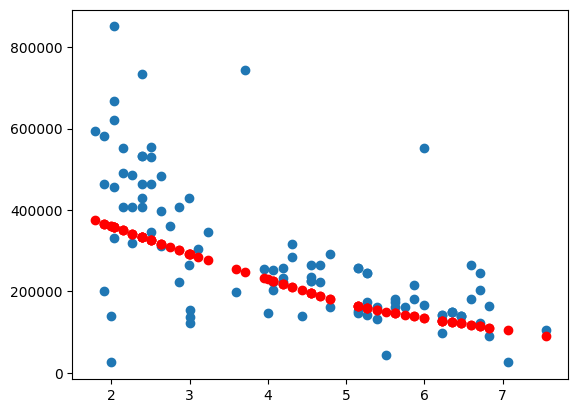

In [ ]:
plt.scatter(rest_data_train['Distance_from_Town_Center'],rest_data_train['Monthly_Revenue'], label='Data')
plt.scatter(rest_data_train['Distance_from_Town_Center'],y_tf_train_pred, color='red', label='Predictions')

In [ ]:
y_tf_test_pred=pd.DataFrame(y_tf_test_pred)
y_pred_test=pd.DataFrame(y_pred_test)

In [ ]:
y_tf_test_pred.to_excel('updated_rest.xlsx',sheet_name='prediction_Linear')
y_pred_test.to_excel('updated_rest_2.xlsx',sheet_name='prediction_NN')

In [ ]:
temp2=rest_data_train['Distance_from_Town_Center']
temp2

0     4.00
1     2.15
2     5.15
3     4.55
4     2.99
      ... 
94    3.00
95    3.11
96    6.00
97    1.79
98    2.27
Name: Distance_from_Town_Center, Length: 99, dtype: float64

###**Implementing Polynomial Regression Model**

Polynomial regression is a technique we can use to fit a regression model when the relationship between the predictor variable(s) and the response variable is nonlinear.

In [ ]:
poly=PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(np.asanyarray(rest_data_train['Distance_from_Town_Center']).reshape(-1, 1))
#poly_features
poly_features_2=poly.fit_transform(np.asanyarray(rest_data_test['Distance_from_Town_Center']).reshape(-1, 1))
poly_features_2

array([[  9.    ,  81.    ],
       [  1.    ,   1.    ],
       [  3.    ,   9.    ],
       [  2.    ,   4.    ],
       [  1.    ,   1.    ],
       [  7.    ,  49.    ],
       [  2.    ,   4.    ],
       [  4.31  ,  18.5761],
       [  3.    ,   9.    ],
       [ 11.    , 121.    ],
       [  4.    ,  16.    ]])

In [ ]:
poly_reg_model = LinearRegression()

In [ ]:
poly_reg_model.fit(poly_features,rest_data_train['Monthly_Revenue'])

LinearRegression()

In [ ]:
y_predicted_poly= poly_reg_model.predict(poly_features)
y_predicted_poly

array([268327.61298217, 449196.81427463, 197850.88574887, 230608.21935989,
       356755.02064881, 246162.81209747, 355757.89167703, 192350.13015232,
       230608.21935989, 421033.68802927, 177949.28561395, 160952.61888766,
       467510.18716931, 223356.27855392, 421033.68802927, 154957.46335447,
       368910.28004113, 187199.61159765, 153659.55226051, 449196.81427463,
       463803.73296014, 160952.61888766, 187199.61159765, 177949.28561395,
       154957.46335447, 197850.88574887, 170099.90779778, 223356.27855392,
       263118.35300259, 254465.46402909, 421033.68802927, 152711.87820843,
       166700.57445253, 153659.55226051, 355757.89167703, 254465.46402909,
       394271.50995143, 291178.44217438, 170099.90779778, 216454.57478983,
       356755.02064881, 394271.50995143, 216454.57478983, 394271.50995143,
       246162.81209747, 160952.61888766, 421033.68802927, 182399.33008486,
       230608.21935989, 154380.81177549, 333495.2129898 , 272121.47901797,
       151867.24122992, 3

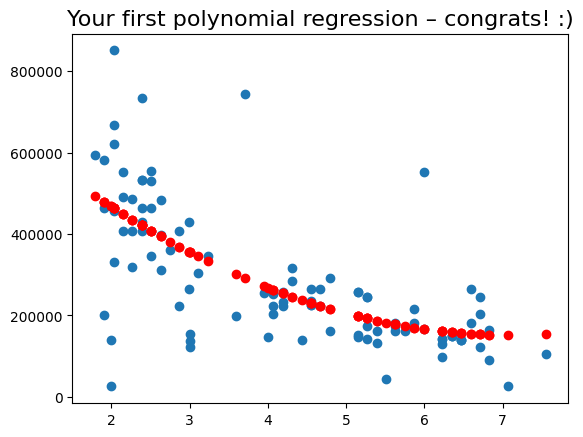

In [ ]:
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(rest_data_train['Distance_from_Town_Center'],rest_data_train['Monthly_Revenue'], label='Data')
plt.scatter(temp2,y_predicted_poly,color='red')
plt.show()

Our Prediction from the Polynomial Regression Model

In [ ]:
y_predicted_test_poly = poly_reg_model.predict(poly_features_2)
y_predicted_test_poly

array([196006.47146901, 603584.49945899, 355757.89167703, 467510.18716931,
       603584.49945899, 151968.87768204, 467510.18716931, 246162.81209747,
       355757.89167703, 337332.13244563, 268327.61298217])